In [27]:
# Snowpark for Python
from snowflake.snowpark import Session
from snowflake.snowpark.version import VERSION
from snowflake.snowpark.types import StructType, StructField, DoubleType, StringType
import snowflake.snowpark.functions as F

# data science libs
import numpy as np
import pandas as pd
import polars as pl
# misc
import json

In [28]:
connection_parameters = json.load(open('connection.json'))
session = Session.builder.configs(connection_parameters).create()
session.sql_simplifier_enabled = True

snowflake_environment = session.sql('SELECT current_user(), current_version()').collect()
snowpark_version = VERSION

# Current Environment Details
print('\nConnection Established with the following parameters:')
print('User                        : {}'.format(snowflake_environment[0][0]))
print('Role                        : {}'.format(session.get_current_role()))
print('Database                    : {}'.format(session.get_current_database()))
print('Schema                      : {}'.format(session.get_current_schema()))
print('Warehouse                   : {}'.format(session.get_current_warehouse()))
print('Snowflake version           : {}'.format(snowflake_environment[0][1]))
print('Snowpark for Python version : {}.{}.{}'.format(snowpark_version[0],snowpark_version[1],snowpark_version[2]))


Connection Established with the following parameters:
User                        : GRIZZLY
Role                        : "TRAINING_ROLE"
Database                    : "HACKATHON_ALGORITHM_AVENGERS"
Schema                      : "PROCUREMENT_ON_TIME_DELIVERY"
Warehouse                   : "ALGORITHM_AVENGERS"
Snowflake version           : 8.8.4
Snowpark for Python version : 1.13.0


In [29]:
session.sql("DESCRIBE TABLE PROCUREMENT_ON_TIME_DELIVERY.PURCHASE_ORDER_HISTORY;").show()

df = session.read.options({"field_delimiter": ",",
                                    "field_optionally_enclosed_by": '"',
                                    "infer_schema": True,
                                    "parse_header": True}).table("PROCUREMENT_ON_TIME_DELIVERY.PURCHASE_ORDER_HISTORY")



# Select only three columns from the DataFrame
#selected_coke = coke.select("PURCHASE_DOCUMENT_ID", "CREATE_DATE", "COMPANY_CODE_ID")

# Show the selected columns

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"name"                     |"type"             |"kind"  |"null?"  |"default"  |"primary key"  |"unique key"  |"check"  |"expression"  |"comment"  |"policy name"  |"privacy domain"  |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|PURCHASE_DOCUMENT_ID       |NUMBER(38,0)       |COLUMN  |Y        |NULL       |N              |N             |NULL     |NULL          |NULL       |NULL           |NULL              |
|CREATE_DATE                |NUMBER(38,0)       |COLUMN  |Y        |NULL       |N              |N             |NULL     |NULL          |NULL       |NULL           |NULL              |
|COMPANY_CODE_ID            |VARCHAR(16777216)  |COLUMN  |Y        |NULL       |

In [30]:
df.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"PURCHASE_DOCUMENT_ID"  |"CREATE_DATE"  |"COMPANY_CODE_ID"  |"VENDOR_ID"  |"POSTAL_CD"  |"RELEASE_DATE"  |"PURCHASE_DOCUMENT_ITEM_ID"  |"MATERIAL_ID"  |"SUB_COMMODITY_DESC"     |"MRP_TYPE_ID"  |"MRP_TYPE_DESC_E"  |"SHORT_TEXT"                              |"PLANT_ID"  |"POR_DELIVERY_DATE"  |"FIRST_GR_POSTING_DATE"  |"DELIVERY_DATE"  |"REQUESTED_DELIVERY_DATE"  |"INBOUND_DELIVERY_ID"  |"INBOUND_DELIVERY_ITEM_ID"  |"PLANNED_DELIVERY_DAYS"  |"BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM"  |
------------------------

In [31]:
koch = df.to_pandas()

In [32]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
0,2000008134,20210726,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,"1/2"" OD x 0.063"" Wall 20' Long ASTM A51",4036.0,NaN,20210812.0,20210806.0,20210806.0,NaN,0.0,0.0,2023-05-30 23:07:43.640
1,5100146560,20210726,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,994 45 9951A TU E 4.99-8.62 3X0X 4014,4016.0,20210914.0,20210914.0,20210910.0,20210910.0,185979544.0,10.0,3.0,2021-11-08 03:52:05.270
2,5501410919,20210726,CA10,8010003139,L6H 5T5,NaN,10.0,NaN,Infrastructure Services,NaN,...,B66 RECHARGE PORTABLE SAFETY SHOWER 2021,4036.0,NaN,0.0,20210802.0,20210802.0,NaN,0.0,0.0,2023-09-07 10:07:29.323
3,2000008138,20210726,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,"5/8"" x 50 ft Black Rubber ProFitter[REG]",4036.0,NaN,20210803.0,20210827.0,20210827.0,NaN,0.0,0.0,2023-05-30 23:07:43.640
4,2000008136,20210726,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,4XL - HI-VIZ SAFETY LONG-SLEEVED SHIRT -,4036.0,NaN,20210730.0,20210805.0,20210805.0,NaN,0.0,0.0,2023-05-30 23:07:43.640


In [33]:
date_columns = ['POR_DELIVERY_DATE', 'DELIVERY_DATE', 'REQUESTED_DELIVERY_DATE', 'FIRST_GR_POSTING_DATE']
for column in date_columns:
    temp_series = koch[column].fillna(0).astype(int).astype(str)
    # Replace '0' string back to NaN to avoid incorrect date conversion
    temp_series = temp_series.replace('0', np.nan)
    # Convert to datetime
    koch[column] = pd.to_datetime(temp_series, format='%Y%m%d', errors='coerce')
#Creating target column
koch['Time_Difference'] = koch['FIRST_GR_POSTING_DATE'] - koch['DELIVERY_DATE']
koch['Time_Difference'] = koch['Time_Difference'].dt.days


In [34]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference
0,2000008134,20210726,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,4036.0,NaT,2021-08-12,2021-08-06,2021-08-06,NaN,0.0,0.0,2023-05-30 23:07:43.640,6.0
1,5100146560,20210726,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,4016.0,2021-09-14,2021-09-14,2021-09-10,2021-09-10,185979544.0,10.0,3.0,2021-11-08 03:52:05.270,4.0
2,5501410919,20210726,CA10,8010003139,L6H 5T5,NaN,10.0,NaN,Infrastructure Services,NaN,...,4036.0,NaT,NaT,2021-08-02,2021-08-02,NaN,0.0,0.0,2023-09-07 10:07:29.323,NaN
3,2000008138,20210726,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,4036.0,NaT,2021-08-03,2021-08-27,2021-08-27,NaN,0.0,0.0,2023-05-30 23:07:43.640,-24.0
4,2000008136,20210726,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,4036.0,NaT,2021-07-30,2021-08-05,2021-08-05,NaN,0.0,0.0,2023-05-30 23:07:43.640,-6.0


In [35]:
coke = pl.from_pandas(koch)

In [36]:
coke.head()

PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference
i64,i32,str,str,str,f64,f64,f64,str,f64,f64,str,f64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,f64,str,datetime[ns],f64
2000008134,20210726,"""CA10""","""8010005836""","""N2C 0B7""",null,30.0,null,"""Machinery & Eq…",null,null,"""1/2"" OD x 0.06…",4036.0,null,2021-08-12 00:00:00,2021-08-06 00:00:00,2021-08-06 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,6.0
5100146560,20210726,"""US10""",null,null,null,130.0,2.1000e9,"""Custom Manufac…",1.0,1.0,"""994 45 9951A T…",4016.0,2021-09-14 00:00:00,2021-09-14 00:00:00,2021-09-10 00:00:00,2021-09-10 00:00:00,1.85979544e8,10.0,"""3.0""",2021-11-08 03:52:05.270,4.0
5501410919,20210726,"""CA10""","""8010003139""","""L6H 5T5""",null,10.0,null,"""Infrastructure…",null,null,"""B66 RECHARGE P…",4036.0,null,null,2021-08-02 00:00:00,2021-08-02 00:00:00,null,0.0,"""0.0""",2023-09-07 10:07:29.323,null
2000008138,20210726,"""CA10""","""8010005836""","""N2C 0B7""",null,20.0,null,"""Piping & Tubin…",null,null,"""5/8"" x 50 ft B…",4036.0,null,2021-08-03 00:00:00,2021-08-27 00:00:00,2021-08-27 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-24.0
2000008136,20210726,"""CA10""","""8010005836""","""N2C 0B7""",null,40.0,null,"""Material Handl…",null,null,"""4XL - HI-VIZ S…",4036.0,null,2021-07-30 00:00:00,2021-08-05 00:00:00,2021-08-05 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-6.0


In [37]:
coke = coke.with_columns(pl.col('CREATE_DATE').cast(pl.Utf8))

In [38]:
coke = coke.with_columns(
    pl.col("CREATE_DATE").str.strptime(pl.Date, "%Y%m%d").alias("CREATE_DATE")
)

In [39]:
coke.tail(1000)

PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference
i64,date,str,str,str,f64,f64,f64,str,f64,f64,str,f64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,f64,str,datetime[ns],f64
5501410370,2021-07-23,"""US39""","""8010097537""","""89423""",null,10.0,1.1001e9,"""Instrumentatio…",1.0,1.0,"""PROBE VIBRATIO…",4124.0,null,2021-09-01 00:00:00,2021-08-06 00:00:00,2021-08-06 00:00:00,null,0.0,"""14.0""",2023-05-30 23:07:43.640,26.0
5100146451,2021-07-23,"""CA10""",null,null,null,30.0,2.1000e9,"""Tolling""",1.0,1.0,"""N66 14 MC 00WW…",4036.0,null,null,2021-07-23 00:00:00,2021-07-23 00:00:00,null,0.0,"""0.0""",2021-11-08 03:52:05.270,null
5501410399,2021-07-23,"""US39""","""8010099411""","""46319""",null,10.0,2.1000e9,"""Additives, Col…",1.0,1.0,"""ADI-PURE® HP A…",4130.0,null,2021-08-02 00:00:00,2021-07-30 00:00:00,2021-07-30 00:00:00,1.858915e8,10.0,"""1.0""",2023-05-30 23:07:43.640,3.0
5501410394,2021-07-23,"""US39""","""8010099411""","""46319""",null,10.0,2.1000e9,"""Additives, Col…",1.0,1.0,"""ADI-PURE® HP A…",4115.0,null,2021-07-30 00:00:00,2021-07-27 00:00:00,2021-07-27 00:00:00,1.85886063e8,10.0,"""1.0""",2023-05-30 23:07:43.640,3.0
2000008020,2021-07-23,"""US10""","""8010099066""","""98109""",null,20.0,null,"""Office Supplie…",null,null,"""1600 Pieces St…",4014.0,null,2021-07-24 00:00:00,2021-07-24 00:00:00,2021-07-24 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,0.0
5100146459,2021-07-23,"""CA10""",null,null,null,10.0,2.1000e9,"""Tolling""",1.0,1.0,"""N66 41 MC 00CN…",4007.0,null,2021-07-24 00:00:00,2021-07-23 00:00:00,2021-07-23 00:00:00,1.85871395e8,10.0,"""0.0""",2021-11-08 03:52:05.270,1.0
5501410521,2021-07-23,"""CA10""","""8010003958""","""43015-8903""",null,140.0,3.1000e9,"""CONTAINMENTS""",1.0,1.0,"""DRUM 55GAL TH …",4040.0,null,2021-09-22 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,1.85910289e8,10.0,"""35.0""",2023-05-30 23:07:43.640,21.0
5501410521,2021-07-23,"""CA10""","""8010003958""","""43015-8903""",null,160.0,3.1000e9,"""CONTAINMENTS""",1.0,1.0,"""DRUM 55GAL TH …",4040.0,null,2021-09-09 00:00:00,2021-09-06 00:00:00,2021-09-06 00:00:00,1.85910249e8,10.0,"""35.0""",2023-05-30 23:07:43.640,3.0
5501410521,2021-07-23,"""CA10""","""8010003958""","""43015-8903""",null,150.0,3.1000e9,"""CONTAINMENTS""",1.0,1.0,"""DRUM 55GAL TH …",4040.0,null,2021-09-10 00:00:00,2021-09-03 00:00:00,2021-09-03 00:00:00,1.85910286e8,10.0,"""35.0""",2023-05-30 23:07:43.640,7.0


In [40]:
coke = coke.with_columns([
    pl.col('CREATE_DATE').dt.weekday().alias('day_of_week'),  # Monday=0, Sunday=6
    pl.col('CREATE_DATE').dt.month().alias('month'),
    pl.col('CREATE_DATE').dt.quarter().alias('quarter')
])

In [41]:
coke.head()

PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,day_of_week,month,quarter
i64,date,str,str,str,f64,f64,f64,str,f64,f64,str,f64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,f64,str,datetime[ns],f64,u32,u32,u32
2000008134,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,30.0,null,"""Machinery & Eq…",null,null,"""1/2"" OD x 0.06…",4036.0,null,2021-08-12 00:00:00,2021-08-06 00:00:00,2021-08-06 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,6.0,1,7,3
5100146560,2021-07-26,"""US10""",null,null,null,130.0,2.1000e9,"""Custom Manufac…",1.0,1.0,"""994 45 9951A T…",4016.0,2021-09-14 00:00:00,2021-09-14 00:00:00,2021-09-10 00:00:00,2021-09-10 00:00:00,1.85979544e8,10.0,"""3.0""",2021-11-08 03:52:05.270,4.0,1,7,3
5501410919,2021-07-26,"""CA10""","""8010003139""","""L6H 5T5""",null,10.0,null,"""Infrastructure…",null,null,"""B66 RECHARGE P…",4036.0,null,null,2021-08-02 00:00:00,2021-08-02 00:00:00,null,0.0,"""0.0""",2023-09-07 10:07:29.323,null,1,7,3
2000008138,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,20.0,null,"""Piping & Tubin…",null,null,"""5/8"" x 50 ft B…",4036.0,null,2021-08-03 00:00:00,2021-08-27 00:00:00,2021-08-27 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-24.0,1,7,3
2000008136,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,40.0,null,"""Material Handl…",null,null,"""4XL - HI-VIZ S…",4036.0,null,2021-07-30 00:00:00,2021-08-05 00:00:00,2021-08-05 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-6.0,1,7,3


In [42]:
value_counts = coke.group_by('day_of_week').agg(pl.count('day_of_week').alias('frequency'))

value_counts_sorted = value_counts.sort('frequency')

In [43]:
import plotly.express as px
df = value_counts_sorted.to_pandas()
# Map the numeric day of the week to actual day names for better readability
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
             5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_names)

# Sort the DataFrame by 'day_of_week' to ensure the days are in the correct order
df = df.sort_values('day_of_week')

# Create the bar chart using Plotly Express
fig = px.bar(df, x='day_name', y='frequency', 
             title='Frequency of Days of the Week When Purchased',
             labels={'day_name': 'Day of the Week', 'frequency': 'Frequency'},
             color='day_name')

# Show the plot
fig.show()

In [44]:
coke = coke.with_columns(pl.col('DELIVERY_DATE').cast(pl.Utf8))
coke = coke.with_columns(
    pl.col("DELIVERY_DATE").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S.%f")
)

coke = coke.with_columns([
    pl.col('DELIVERY_DATE').dt.weekday().alias('D_day_of_week'),  # Monday=0, Sunday=6
])
value_counts = coke.group_by('D_day_of_week').agg(pl.count('D_day_of_week').alias('D_frequency'))

value_counts_sorted_D = value_counts.sort('D_frequency')

/var/folders/jf/5crtmt7n2rl3tww1rbt55bd80000gn/T/ipykernel_2156/2902027795.py:3: ChronoFormatWarning:

Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime



In [45]:
value_counts_sorted_D

D_day_of_week,D_frequency
u32,u32
null,45651
7,74048
6,85618
3,164272
4,164285
2,181674
1,189535
5,234324


In [46]:

ddf = value_counts_sorted_D 
ddf = ddf.to_pandas()
# Map the numeric day of the week to actual day names for better readability
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
             5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
ddf['day_name'] = ddf['D_day_of_week'].map(day_names)

# Sort the DataFrame by 'D_day_of_week' to ensure the days are in the correct order
ddf = ddf.sort_values('D_day_of_week')

# Create the bar chart using Plotly Express
fig = px.bar(ddf, x='day_name', y='D_frequency', 
             title='Frequency of Days of the Week When Delivered',
             labels={'day_name': 'Day of the Week', 'D_frequency': 'Frequency'},
             color='day_name')

# Show the plot
fig.show()


In [47]:
coke.head()

PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,day_of_week,month,quarter,D_day_of_week
i64,date,str,str,str,f64,f64,f64,str,f64,f64,str,f64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,f64,str,datetime[ns],f64,u32,u32,u32,u32
2000008134,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,30.0,null,"""Machinery & Eq…",null,null,"""1/2"" OD x 0.06…",4036.0,null,2021-08-12 00:00:00,2021-08-06 00:00:00,2021-08-06 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,6.0,1,7,3,5
5100146560,2021-07-26,"""US10""",null,null,null,130.0,2.1000e9,"""Custom Manufac…",1.0,1.0,"""994 45 9951A T…",4016.0,2021-09-14 00:00:00,2021-09-14 00:00:00,2021-09-10 00:00:00,2021-09-10 00:00:00,1.85979544e8,10.0,"""3.0""",2021-11-08 03:52:05.270,4.0,1,7,3,5
5501410919,2021-07-26,"""CA10""","""8010003139""","""L6H 5T5""",null,10.0,null,"""Infrastructure…",null,null,"""B66 RECHARGE P…",4036.0,null,null,2021-08-02 00:00:00,2021-08-02 00:00:00,null,0.0,"""0.0""",2023-09-07 10:07:29.323,null,1,7,3,1
2000008138,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,20.0,null,"""Piping & Tubin…",null,null,"""5/8"" x 50 ft B…",4036.0,null,2021-08-03 00:00:00,2021-08-27 00:00:00,2021-08-27 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-24.0,1,7,3,5
2000008136,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,40.0,null,"""Material Handl…",null,null,"""4XL - HI-VIZ S…",4036.0,null,2021-07-30 00:00:00,2021-08-05 00:00:00,2021-08-05 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-6.0,1,7,3,4


In [48]:
from pycaret.regression import *

Create Dataset

In [5]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM
0,2000008134,20210726,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,"1/2"" OD x 0.063"" Wall 20' Long ASTM A51",4036.0,NaN,20210812.0,20210806.0,20210806.0,NaN,0.0,0.0,2023-05-30 23:07:43.640
1,5100146560,20210726,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,994 45 9951A TU E 4.99-8.62 3X0X 4014,4016.0,20210914.0,20210914.0,20210910.0,20210910.0,185979544.0,10.0,3.0,2021-11-08 03:52:05.270
2,5501410919,20210726,CA10,8010003139,L6H 5T5,NaN,10.0,NaN,Infrastructure Services,NaN,...,B66 RECHARGE PORTABLE SAFETY SHOWER 2021,4036.0,NaN,0.0,20210802.0,20210802.0,NaN,0.0,0.0,2023-09-07 10:07:29.323
3,2000008138,20210726,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,"5/8"" x 50 ft Black Rubber ProFitter[REG]",4036.0,NaN,20210803.0,20210827.0,20210827.0,NaN,0.0,0.0,2023-05-30 23:07:43.640
4,2000008136,20210726,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,4XL - HI-VIZ SAFETY LONG-SLEEVED SHIRT -,4036.0,NaN,20210730.0,20210805.0,20210805.0,NaN,0.0,0.0,2023-05-30 23:07:43.640


In [49]:
def determine_status(days):
    if days < 0:
        return 'Early'
    elif days == 0:
        return 'On Time'
    else:
        return 'Late'
# Give a status of it
koch['Arrival_Status'] = koch['Time_Difference'].apply(determine_status)

In [50]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,Arrival_Status
0,2000008134,20210726,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,NaT,2021-08-12,2021-08-06,2021-08-06,NaN,0.0,0.0,2023-05-30 23:07:43.640,6.0,Late
1,5100146560,20210726,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,2021-09-14,2021-09-14,2021-09-10,2021-09-10,185979544.0,10.0,3.0,2021-11-08 03:52:05.270,4.0,Late
2,5501410919,20210726,CA10,8010003139,L6H 5T5,NaN,10.0,NaN,Infrastructure Services,NaN,...,NaT,NaT,2021-08-02,2021-08-02,NaN,0.0,0.0,2023-09-07 10:07:29.323,NaN,Late
3,2000008138,20210726,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,NaT,2021-08-03,2021-08-27,2021-08-27,NaN,0.0,0.0,2023-05-30 23:07:43.640,-24.0,Early
4,2000008136,20210726,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,NaT,2021-07-30,2021-08-05,2021-08-05,NaN,0.0,0.0,2023-05-30 23:07:43.640,-6.0,Early


In [51]:
# Count occurrences of each category in 'SUB_COMMODITY_DESC'
category_counts = koch['SUB_COMMODITY_DESC'].value_counts()

# Create a new column 'Category_total_counts' by mapping counts based on 'SUB_COMMODITY_DESC'
koch['Category_total_counts'] = koch['SUB_COMMODITY_DESC'].map(category_counts)

# Create a DataFrame with unique 'SUB_COMMODITY_DESC' and corresponding counts
selected_columns = koch[['SUB_COMMODITY_DESC', 'Category_total_counts']].drop_duplicates()

# Create a new column 'Ranking' based on the order of 'Category_total_counts'
selected_columns['Ranking'] = selected_columns['Category_total_counts'].rank(ascending=False, method='min')

# Sort the DataFrame by 'Category_total_counts' in descending order and then by 'Ranking' in ascending order
selected_columns = selected_columns.sort_values(by=['Ranking','Category_total_counts'], ascending=[False, True])

# Drop rows with missing values
selected_columns = selected_columns.dropna()

selected_columns = selected_columns[['Ranking', 'SUB_COMMODITY_DESC']]



In [52]:
selected_columns

,Ranking,SUB_COMMODITY_DESC
5538,72.0,Admin Services
133903,71.0,Marketing Consulting Services
2555,70.0,"Pads, Trays & Locators"
5421,69.0,Security Services
11737,68.0,Health Services
...,...,...
3,5.0,Piping & Tubing
35,4.0,Resins & Polymers
5,3.0,Tolling
1,2.0,Custom Manufacturing


In [53]:
koch = koch.merge(selected_columns, on='SUB_COMMODITY_DESC', how='left')

In [54]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,Arrival_Status,Category_total_counts,Ranking
0,2000008134,20210726,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,2021-08-06,2021-08-06,NaN,0.0,0.0,2023-05-30 23:07:43.640,6.0,Late,38309.0,10.0
1,5100146560,20210726,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,2021-09-10,2021-09-10,185979544.0,10.0,3.0,2021-11-08 03:52:05.270,4.0,Late,106973.0,2.0
2,5501410919,20210726,CA10,8010003139,L6H 5T5,NaN,10.0,NaN,Infrastructure Services,NaN,...,2021-08-02,2021-08-02,NaN,0.0,0.0,2023-09-07 10:07:29.323,NaN,Late,11952.0,22.0
3,2000008138,20210726,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,2021-08-27,2021-08-27,NaN,0.0,0.0,2023-05-30 23:07:43.640,-24.0,Early,77387.0,5.0
4,2000008136,20210726,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,2021-08-05,2021-08-05,NaN,0.0,0.0,2023-05-30 23:07:43.640,-6.0,Early,57662.0,7.0


In [55]:
# Count occurrences of each category in 'MATERIAL_ID'
material_counts = koch['MATERIAL_ID'].value_counts()

# Create a new column 'Material_total_counts' by mapping counts based on 'MATERIAL_ID'
koch['Material_total_counts'] = koch['MATERIAL_ID'].map(material_counts)

# Create a DataFrame with unique 'MATERIAL_ID' and corresponding counts
selected_columns1 = koch[['MATERIAL_ID', 'Material_total_counts']].drop_duplicates()

# Create a new column 'Ranking' based on the order of 'Material_total_counts'
selected_columns1['Ranking_M'] = selected_columns1['Material_total_counts'].rank(ascending=False, method='min')

# Sort the DataFrame by 'Material_total_counts' in descending order and then by 'Ranking' in ascending order
selected_columns1 = selected_columns1.sort_values(by=['Material_total_counts', 'Ranking_M'], ascending=[False, True])
selected_columns1 = selected_columns1[['Ranking_M', 'Material_total_counts', 'MATERIAL_ID']].drop_duplicates()

# Drop rows with missing values
selected_columns1 = selected_columns1.dropna()
selected_columns1 = selected_columns1[['Ranking_M', 'MATERIAL_ID']]


In [56]:
selected_columns1

,Ranking_M,MATERIAL_ID
51,1.0,2.100018e+09
866,2.0,2.100013e+09
473,3.0,2.100013e+09
4523,4.0,2.100013e+09
867,5.0,2.100027e+09
...,...,...
1138513,28127.0,1.100123e+09
1138650,28127.0,1.100226e+09
1138849,28127.0,1.100093e+09
1138939,28127.0,1.100257e+09


In [57]:
koch = koch.merge(selected_columns1, on='MATERIAL_ID', how='left')

In [58]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,Arrival_Status,Category_total_counts,Ranking,Material_total_counts,Ranking_M
0,2000008134,20210726,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,NaN,0.0,0.0,2023-05-30 23:07:43.640,6.0,Late,38309.0,10.0,NaN,NaN
1,5100146560,20210726,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,185979544.0,10.0,3.0,2021-11-08 03:52:05.270,4.0,Late,106973.0,2.0,82.0,713.0
2,5501410919,20210726,CA10,8010003139,L6H 5T5,NaN,10.0,NaN,Infrastructure Services,NaN,...,NaN,0.0,0.0,2023-09-07 10:07:29.323,NaN,Late,11952.0,22.0,NaN,NaN
3,2000008138,20210726,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,NaN,0.0,0.0,2023-05-30 23:07:43.640,-24.0,Early,77387.0,5.0,NaN,NaN
4,2000008136,20210726,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,NaN,0.0,0.0,2023-05-30 23:07:43.640,-6.0,Early,57662.0,7.0,NaN,NaN


In [59]:
koch = pl.from_pandas(koch)
koch = koch.with_columns(pl.col('CREATE_DATE').cast(pl.Utf8))
koch = koch.with_columns(
    pl.col("CREATE_DATE").str.strptime(pl.Date, "%Y%m%d").alias("CREATE_DATE")
)
koch = koch.with_columns([
    pl.col('CREATE_DATE').dt.weekday().alias('day_of_week'),  # Monday=0, Sunday=6
    pl.col('CREATE_DATE').dt.month().alias('month'),
    pl.col('CREATE_DATE').dt.quarter().alias('quarter')
])

In [60]:
koch.head()

PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,Arrival_Status,Category_total_counts,Ranking,Material_total_counts,Ranking_M,day_of_week,month,quarter
i64,date,str,str,str,f64,f64,f64,str,f64,f64,str,f64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,f64,str,datetime[ns],f64,str,f64,f64,f64,f64,u32,u32,u32
2000008134,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,30.0,null,"""Machinery & Eq…",null,null,"""1/2"" OD x 0.06…",4036.0,null,2021-08-12 00:00:00,2021-08-06 00:00:00,2021-08-06 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,6.0,"""Late""",38309.0,10.0,null,null,1,7,3
5100146560,2021-07-26,"""US10""",null,null,null,130.0,2.1000e9,"""Custom Manufac…",1.0,1.0,"""994 45 9951A T…",4016.0,2021-09-14 00:00:00,2021-09-14 00:00:00,2021-09-10 00:00:00,2021-09-10 00:00:00,1.85979544e8,10.0,"""3.0""",2021-11-08 03:52:05.270,4.0,"""Late""",106973.0,2.0,82.0,713.0,1,7,3
5501410919,2021-07-26,"""CA10""","""8010003139""","""L6H 5T5""",null,10.0,null,"""Infrastructure…",null,null,"""B66 RECHARGE P…",4036.0,null,null,2021-08-02 00:00:00,2021-08-02 00:00:00,null,0.0,"""0.0""",2023-09-07 10:07:29.323,null,"""Late""",11952.0,22.0,null,null,1,7,3
2000008138,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,20.0,null,"""Piping & Tubin…",null,null,"""5/8"" x 50 ft B…",4036.0,null,2021-08-03 00:00:00,2021-08-27 00:00:00,2021-08-27 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-24.0,"""Early""",77387.0,5.0,null,null,1,7,3
2000008136,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,40.0,null,"""Material Handl…",null,null,"""4XL - HI-VIZ S…",4036.0,null,2021-07-30 00:00:00,2021-08-05 00:00:00,2021-08-05 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-6.0,"""Early""",57662.0,7.0,null,null,1,7,3


In [61]:
koch = koch.with_columns(pl.col('DELIVERY_DATE').cast(pl.Utf8))
koch = koch.with_columns(
    pl.col("DELIVERY_DATE").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S.%f")
)

koch = koch.with_columns([
    pl.col('DELIVERY_DATE').dt.weekday().alias('D_day_of_week'),  # Monday=0, Sunday=6
])

In [424]:
koch.head()

PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,MRP_TYPE_DESC_E,SHORT_TEXT,PLANT_ID,POR_DELIVERY_DATE,FIRST_GR_POSTING_DATE,DELIVERY_DATE,REQUESTED_DELIVERY_DATE,INBOUND_DELIVERY_ID,INBOUND_DELIVERY_ITEM_ID,PLANNED_DELIVERY_DAYS,BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM,Time_Difference,Arrival_Status,Category_total_counts,Ranking,Material_total_counts,Ranking_M,day_of_week,month,quarter,D_day_of_week
i64,date,str,str,str,f64,f64,f64,str,f64,f64,str,f64,datetime[ns],datetime[ns],datetime[ns],datetime[ns],f64,f64,str,datetime[ns],f64,str,f64,f64,f64,f64,u32,u32,u32,u32
2000008134,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,30.0,null,"""Machinery & Eq…",null,null,"""1/2"" OD x 0.06…",4036.0,null,2021-08-12 00:00:00,2021-08-06 00:00:00,2021-08-06 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,6.0,"""Late""",38309.0,10.0,null,null,1,7,3,5
5100146560,2021-07-26,"""US10""",null,null,null,130.0,2.1000e9,"""Custom Manufac…",1.0,1.0,"""994 45 9951A T…",4016.0,2021-09-14 00:00:00,2021-09-14 00:00:00,2021-09-10 00:00:00,2021-09-10 00:00:00,1.85979544e8,10.0,"""3.0""",2021-11-08 03:52:05.270,4.0,"""Late""",106973.0,2.0,82.0,713.0,1,7,3,5
5501410919,2021-07-26,"""CA10""","""8010003139""","""L6H 5T5""",null,10.0,null,"""Infrastructure…",null,null,"""B66 RECHARGE P…",4036.0,null,null,2021-08-02 00:00:00,2021-08-02 00:00:00,null,0.0,"""0.0""",2023-09-07 10:07:29.323,null,"""Late""",11952.0,22.0,null,null,1,7,3,1
2000008138,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,20.0,null,"""Piping & Tubin…",null,null,"""5/8"" x 50 ft B…",4036.0,null,2021-08-03 00:00:00,2021-08-27 00:00:00,2021-08-27 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-24.0,"""Early""",77387.0,5.0,null,null,1,7,3,5
2000008136,2021-07-26,"""CA10""","""8010005836""","""N2C 0B7""",null,40.0,null,"""Material Handl…",null,null,"""4XL - HI-VIZ S…",4036.0,null,2021-07-30 00:00:00,2021-08-05 00:00:00,2021-08-05 00:00:00,null,0.0,"""0.0""",2023-05-30 23:07:43.640,-6.0,"""Early""",57662.0,7.0,null,null,1,7,3,4


In [64]:
koch = koch.to_pandas()
koch = koch.dropna(subset=['Time_Difference'])
koch.isna().sum()

PURCHASE_DOCUMENT_ID                           0
CREATE_DATE                                    0
COMPANY_CODE_ID                                0
VENDOR_ID                                 182957
POSTAL_CD                                 183927
RELEASE_DATE                              945562
PURCHASE_DOCUMENT_ITEM_ID                      0
MATERIAL_ID                               437382
SUB_COMMODITY_DESC                           190
MRP_TYPE_ID                               437382
MRP_TYPE_DESC_E                           437382
SHORT_TEXT                                     2
PLANT_ID                                       4
POR_DELIVERY_DATE                         636604
FIRST_GR_POSTING_DATE                          0
DELIVERY_DATE                                  0
REQUESTED_DELIVERY_DATE                       31
INBOUND_DELIVERY_ID                       501397
INBOUND_DELIVERY_ITEM_ID                       0
PLANNED_DELIVERY_DAYS                          0
BI_LAST_UPDATED_PURC

In [65]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,Time_Difference,Arrival_Status,Category_total_counts,Ranking,Material_total_counts,Ranking_M,day_of_week,month,quarter,D_day_of_week
0,2000008134,2021-07-26,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,6.0,Late,38309.0,10.0,NaN,NaN,1,7,3,5.0
1,5100146560,2021-07-26,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,4.0,Late,106973.0,2.0,82.0,713.0,1,7,3,5.0
3,2000008138,2021-07-26,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,-24.0,Early,77387.0,5.0,NaN,NaN,1,7,3,5.0
4,2000008136,2021-07-26,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,-6.0,Early,57662.0,7.0,NaN,NaN,1,7,3,4.0
5,5100146528,2021-07-26,CA10,None,None,NaN,10.0,2.100022e+09,Tolling,1.0,...,7.0,Late,96024.0,3.0,910.0,70.0,1,7,3,2.0


## Feature Engineering
** David P

In [66]:


koch['PLANNED_DELIVERY_DAYS'] = pd.to_numeric(koch['PLANNED_DELIVERY_DAYS'], errors='coerce')

material_stats = koch.groupby('MATERIAL_ID')['PLANNED_DELIVERY_DAYS'].agg(['mean', 'median']).reset_index()

material_stats.columns = ['MATERIAL_ID', 'Mean_Delay_Material', 'Mean_Delay_Material']


In [67]:
material_stats

,MATERIAL_ID,Mean_Delay_Material,Mean_Delay_Material
0,1.100000e+09,39.000000,39.0
1,1.100000e+09,6.913043,7.0
2,1.100000e+09,5.259259,6.0
3,1.100000e+09,3.000000,3.0
4,1.100000e+09,3.000000,3.0
...,...,...,...
32411,4.100007e+09,42.000000,42.0
32412,4.100007e+09,56.000000,56.0
32413,4.100007e+09,42.000000,42.0
32414,4.100007e+09,42.000000,42.0


In [68]:
material_stats.columns = ['MATERIAL_ID', 'Mean_Delay_Material', 'Median_Delay_Material']

In [69]:
koch = pd.merge(koch, material_stats, on='MATERIAL_ID', how='left')

In [70]:
koch.head()

,PURCHASE_DOCUMENT_ID,CREATE_DATE,COMPANY_CODE_ID,VENDOR_ID,POSTAL_CD,RELEASE_DATE,PURCHASE_DOCUMENT_ITEM_ID,MATERIAL_ID,SUB_COMMODITY_DESC,MRP_TYPE_ID,...,Category_total_counts,Ranking,Material_total_counts,Ranking_M,day_of_week,month,quarter,D_day_of_week,Mean_Delay_Material,Median_Delay_Material
0,2000008134,2021-07-26,CA10,8010005836,N2C 0B7,NaN,30.0,NaN,Machinery & Equipment,NaN,...,38309.0,10.0,NaN,NaN,1,7,3,5.0,NaN,NaN
1,5100146560,2021-07-26,US10,None,None,NaN,130.0,2.100008e+09,Custom Manufacturing,1.0,...,106973.0,2.0,82.0,713.0,1,7,3,5.0,18.307692,3.0
2,2000008138,2021-07-26,CA10,8010005836,N2C 0B7,NaN,20.0,NaN,Piping & Tubing,NaN,...,77387.0,5.0,NaN,NaN,1,7,3,5.0,NaN,NaN
3,2000008136,2021-07-26,CA10,8010005836,N2C 0B7,NaN,40.0,NaN,Material Handling,NaN,...,57662.0,7.0,NaN,NaN,1,7,3,4.0,NaN,NaN
4,5100146528,2021-07-26,CA10,None,None,NaN,10.0,2.100022e+09,Tolling,1.0,...,96024.0,3.0,910.0,70.0,1,7,3,2.0,0.000000,0.0


In [71]:
mean_delay_corr_material = koch['Mean_Delay_Material'].corr(koch['PLANNED_DELIVERY_DAYS'])
# Check correlation between Median_Delay and Time_Difference
median_delay_corr_mateial = koch['Mean_Delay_Material'].corr(koch['PLANNED_DELIVERY_DAYS'])


print(mean_delay_corr_material)
print(median_delay_corr_mateial)

0.9191710700357338
0.9191710700357338


In [432]:
koch.columns

Index(['PURCHASE_DOCUMENT_ID', 'CREATE_DATE', 'COMPANY_CODE_ID', 'VENDOR_ID',
       'POSTAL_CD', 'RELEASE_DATE', 'PURCHASE_DOCUMENT_ITEM_ID', 'MATERIAL_ID',
       'SUB_COMMODITY_DESC', 'MRP_TYPE_ID', 'MRP_TYPE_DESC_E', 'SHORT_TEXT',
       'PLANT_ID', 'POR_DELIVERY_DATE', 'FIRST_GR_POSTING_DATE',
       'DELIVERY_DATE', 'REQUESTED_DELIVERY_DATE', 'INBOUND_DELIVERY_ID',
       'INBOUND_DELIVERY_ITEM_ID', 'PLANNED_DELIVERY_DAYS',
       'BI_LAST_UPDATED_PURCHASE_DOCUMENT_ITEM', 'Time_Difference',
       'Arrival_Status', 'Category_total_counts', 'Ranking',
       'Material_total_counts', 'Ranking_M', 'day_of_week', 'month', 'quarter',
       'D_day_of_week', 'Mean_Delay_Material', 'Median_Delay_Material'],
      dtype='object')

In [72]:
koch['COUNTRY'] = koch['COMPANY_CODE_ID'].str.slice(0, 2)

koch['CREATE_DATE'] = koch['CREATE_DATE'].astype(str)


In [73]:
from datetime import date
import holidays
import pandas as pd

# Define the countries and years
countries = {
    'US': 'United States',
    'CA': 'Canada',
    'GB': 'United Kingdom',
    'CN': 'China',
    'JP': 'Japan',
    'NL': 'Netherlands',
    'KR': 'South Korea',
    'SG': 'Singapore',
    'DE': 'Germany',
    'FR': 'France'
}

years = [2018, 2019, 2020, 2021, 2022]

# Initialize a dictionary to store holidays for each country and year
federal_holidays = {}

# Loop through each country and each year to retrieve holidays
for country_code, country_name in countries.items():
    country_holidays = {}
    for year in years:
        # Retrieve holidays for the current country and year
        holidays_obj = holidays.CountryHoliday(country_code, years=year)
        country_holidays[year] = [date.strftime('%m-%d') for date in holidays_obj]
    # Store holidays for the current country in the dictionary
    federal_holidays[country_code] = country_holidays


# Function to check if a date is a holiday for a given country
def is_holiday(row):
    country = row['COUNTRY']
    create_date = row['CREATE_DATE']
    year = int(create_date[:4])  # Extract the year from the Formatted_Date
    return 1 if create_date[5:] in federal_holidays.get(country, {}).get(year, []) else 0


In [74]:

koch['IS_HOLIDAY'] = koch.apply(is_holiday, axis=1)

In [75]:
columns = ['DELIVERY_DATE','SHORT_TEXT','D_day_of_week', 'COUNTRY', 'MATERIAL_ID', 'IS_HOLIDAY', 'Mean_Delay_Material', 'Median_Delay_Material', 'quarter', 'month', 'day_of_week', 'Ranking','Category_total_counts', 'PLANNED_DELIVERY_DAYS', 'INBOUND_DELIVERY_ITEM_ID', 'REQUESTED_DELIVERY_DATE', 'PLANT_ID', 'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID', 'CREATE_DATE', 'Time_Difference']
koch = koch[columns]

In [437]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier, DMatrix, train
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df = koch
# Summoning the dataset

label_encoder = LabelEncoder()
categorical_columns = ['PLANNED_DELIVERY_DAYS', 'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert datetime columns to separate year, month, day columns
datetime_columns = ['REQUESTED_DELIVERY_DATE', 'CREATE_DATE']
for col in datetime_columns:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day

# Drop the original datetime columns
df.drop(columns=datetime_columns, inplace=True)

X = koch.drop('Time_Difference', axis=1)  # Replace 'target_column' with your target column name
y = koch['Time_Difference']

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# For a regression quest
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, enable_categorical=True)

# For a classification quest, comment out the above and uncomment below
# model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3)


In [ ]:
# Training the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)


In [ ]:
# For a regression quest
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

# For a classification quest, comment out the above and uncomment below
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy: {accuracy}")


RMSE: 39.038769419682204


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from pycaret.regression import *
s = setup(data=koch, target='Time_Difference', session_id=123, use_gpu=True, experiment_name="base")

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Description,Value
0,Session id,123
1,Target,Time_Difference
2,Target type,Regression
3,Original data shape,"(959086, 18)"
4,Transformed data shape,"(959086, 18)"
5,Transformed train set shape,"(671360, 18)"
6,Transformed test set shape,"(287726, 18)"
7,Numeric features,17
8,Rows with missing values,0.0%
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:02:24
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,11.7069,1395.7173,37.1825,0.2333,1.0438,1.8798,13.3830
dt,Decision Tree Regressor,10.4479,1465.4311,38.1460,0.1869,0.9701,1.8359,4.7140
lr,Linear Regression,15.1463,1617.7146,40.1515,0.0990,1.4096,2.4451,0.4040
ridge,Ridge Regression,15.1460,1617.7084,40.1515,0.0990,1.4096,2.4449,0.2520
br,Bayesian Ridge,15.1460,1617.7150,40.1515,0.0990,1.4096,2.4449,0.6800
en,Elastic Net,14.3539,1793.8621,42.2202,0.0102,1.3722,1.8295,2.5630
lasso,Lasso Regression,14.3354,1796.0095,42.2453,0.0090,1.3659,1.8201,0.7430
llar,Lasso Least Angle Regression,14.3354,1796.0093,42.2453,0.0090,1.3659,1.8201,0.2680
omp,Orthogonal Matching Pursuit,14.4683,1810.2394,42.4146,0.0010,1.2923,1.8399,0.2830
huber,Huber Regressor,13.1655,1823.6065,42.5724,-0.0065,1.7460,1.0068,4.0140


KeyboardInterrupt: 

In [ ]:
koch.head(10000).to_csv('koch.csv')

In [ ]:
koch.head()

,D_day_of_week,quarter,month,day_of_week,Ranking,Category_total_counts,PLANNED_DELIVERY_DAYS,INBOUND_DELIVERY_ITEM_ID,PLANT_ID,SUB_COMMODITY_DESC,COMPANY_CODE_ID,Time_Difference,REQUESTED_DELIVERY_DATE_year,REQUESTED_DELIVERY_DATE_month,REQUESTED_DELIVERY_DATE_day,CREATE_DATE_year,CREATE_DATE_month,CREATE_DATE_day
0,5.0,3,7,1,10.0,38309.0,0,0.0,4036.0,29,0,6.0,2021.0,8.0,6.0,2021,7,26
1,5.0,3,7,1,2.0,106973.0,154,10.0,4016.0,12,20,4.0,2021.0,9.0,10.0,2021,7,26
3,5.0,3,7,1,5.0,77387.0,0,0.0,4036.0,41,0,-24.0,2021.0,8.0,27.0,2021,7,26
4,4.0,3,7,1,7.0,57662.0,0,0.0,4036.0,35,0,-6.0,2021.0,8.0,5.0,2021,7,26
5,2.0,3,7,1,3.0,96024.0,0,10.0,4007.0,62,0,7.0,2021.0,7.0,27.0,2021,7,26


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop rows with missing values (or you can impute them as well)
df = koch.dropna()

# Assuming 'SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', and 'SUB_COMMODITY_DESC' are categorical
categorical_features = ['SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', 'SUB_COMMODITY_DESC']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Time_Difference']).tolist()

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the dataset into features and target variable
X = df.drop(['Time_Difference'], axis=1)
y = df['Time_Difference']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf


def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=[input_shape]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model


In [ ]:

# Assuming X and y are your features and label
# Now, you can use X_train and X_val in model training and validation
# Make sure to convert them to arrays if your model cannot handle sparse matrices directly
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop rows with missing values (or you can impute them as well)
df = koch.dropna()

# Assuming 'SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', and 'SUB_COMMODITY_DESC' are categorical
categorical_features = ['SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', 'SUB_COMMODITY_DESC']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Time_Difference']).tolist()

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the dataset into features and target variable
X = df.drop(['Time_Difference'], axis=1)
y = df['Time_Difference']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()

# Add input layer with ReLU activation
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers with ReLU activation
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Add output layer with sigmoid activation (for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

ValueError: could not convert string to float: 'Hi-Power® II Belts Hi-Power® II Belts /'

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load your dataframe here
# Assuming 'df' is your DataFrame name and it has been loaded correctly
# df = pd.read_csv('your_dataframe.csv')  # Example for loading data

# Drop rows with missing values (or you can impute them as well)
df.dropna(inplace=True)

# Assuming 'SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', and 'SUB_COMMODITY_DESC' are categorical
categorical_features = ['SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', 'SUB_COMMODITY_DESC']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Time_Difference']).tolist()

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the dataset into features and target variable
X = df.drop(['Time_Difference'], axis=1)
y = df['Time_Difference']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the input features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the neural network model
model = Sequential()

# Add input layer with ReLU activation
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers with ReLU activation
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Modify the output layer for regression with no activation function
model.add(Dense(units=1, activation='linear'))

# Compile the model for a regression problem
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/10


2024-03-02 05:39:53.496996: W tensorflow/core/framework/op_kernel.cc:1827] INVALID_ARGUMENT: TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return fun

InvalidArgumentError: Graph execution error:

Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)
          ^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 519, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]
            ^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py", line 515, in slice_array
    return training_utils.slice_arrays(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]
                ~^^^^^^^^^^^

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1005]

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your DataFrame is named `df`
# df = pd.read_csv('path_to_your_data.csv')  # Load your data here

# Drop rows with missing values (or you can impute them as well)
df = koch.dropna(inplace=True)

# Define categorical and numerical features
categorical_features = ['SHORT_TEXT', 'REQUESTED_DELIVERY_DATE', 'COMPANY_CODE_ID', 'CREATE_DATE', 'SUB_COMMODITY_DESC']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop(['Time_Difference']).tolist()

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Split the dataset into features and target variable
X = df.drop(['Time_Difference'], axis=1)
y = df['Time_Difference']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing and convert sparse matrices to dense arrays
X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

# Neural network model definition
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='linear')  # Linear activation for regression
])

# Compile the model for a regression problem
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


AttributeError: 'NoneType' object has no attribute 'select_dtypes'

In [76]:
koch.head()

,DELIVERY_DATE,SHORT_TEXT,D_day_of_week,COUNTRY,MATERIAL_ID,IS_HOLIDAY,Mean_Delay_Material,Median_Delay_Material,quarter,month,...,Ranking,Category_total_counts,PLANNED_DELIVERY_DAYS,INBOUND_DELIVERY_ITEM_ID,REQUESTED_DELIVERY_DATE,PLANT_ID,SUB_COMMODITY_DESC,COMPANY_CODE_ID,CREATE_DATE,Time_Difference
0,2021-08-06,"1/2"" OD x 0.063"" Wall 20' Long ASTM A51",5.0,CA,NaN,0,NaN,NaN,3,7,...,10.0,38309.0,0.0,0.0,2021-08-06,4036.0,Machinery & Equipment,CA10,2021-07-26,6.0
1,2021-09-10,994 45 9951A TU E 4.99-8.62 3X0X 4014,5.0,US,2.100008e+09,0,18.307692,3.0,3,7,...,2.0,106973.0,3.0,10.0,2021-09-10,4016.0,Custom Manufacturing,US10,2021-07-26,4.0
2,2021-08-27,"5/8"" x 50 ft Black Rubber ProFitter[REG]",5.0,CA,NaN,0,NaN,NaN,3,7,...,5.0,77387.0,0.0,0.0,2021-08-27,4036.0,Piping & Tubing,CA10,2021-07-26,-24.0
3,2021-08-05,4XL - HI-VIZ SAFETY LONG-SLEEVED SHIRT -,4.0,CA,NaN,0,NaN,NaN,3,7,...,7.0,57662.0,0.0,0.0,2021-08-05,4036.0,Material Handling,CA10,2021-07-26,-6.0
4,2021-07-27,N66 2 BT 00WUD BN PL 65 1.5% 0,2.0,CA,2.100022e+09,0,0.000000,0.0,3,7,...,3.0,96024.0,0.0,10.0,2021-07-27,4007.0,Tolling,CA10,2021-07-26,7.0


In [77]:
koch.columns

Index(['DELIVERY_DATE', 'SHORT_TEXT', 'D_day_of_week', 'COUNTRY',
       'MATERIAL_ID', 'IS_HOLIDAY', 'Mean_Delay_Material',
       'Median_Delay_Material', 'quarter', 'month', 'day_of_week', 'Ranking',
       'Category_total_counts', 'PLANNED_DELIVERY_DAYS',
       'INBOUND_DELIVERY_ITEM_ID', 'REQUESTED_DELIVERY_DATE', 'PLANT_ID',
       'SUB_COMMODITY_DESC', 'COMPANY_CODE_ID', 'CREATE_DATE',
       'Time_Difference'],
      dtype='object')

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,56 mins 24 secs
H2O_cluster_timezone:,America/Boise
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_addisonjpratt_2dwg9w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.757 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


ValueError: Found input variables with inconsistent numbers of samples: [958863, 15]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'koch' is your DataFrame
# Split the DataFrame into train and test sets
train_set, test_set = train_test_split(koch, test_size=0.2, random_state=42)




In [ ]:
train_df = h2o.H2OFrame(train_set)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
test = h2o.H2OFrame(test_set)
x = test.columns
y = 'Time_Difference'
# remove label classvariable from feature variable
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
x

['SHORT_TEXT',
 'D_day_of_week',
 'COUNTRY',
 'MATERIAL_ID',
 'IS_HOLIDAY',
 'Mean_Delay_Material',
 'Median_Delay_Material',
 'quarter',
 'month',
 'day_of_week',
 'Ranking',
 'Category_total_counts',
 'PLANNED_DELIVERY_DAYS',
 'INBOUND_DELIVERY_ITEM_ID',
 'REQUESTED_DELIVERY_DATE',
 'PLANT_ID',
 'SUB_COMMODITY_DESC',
 'COMPANY_CODE_ID',
 'CREATE_DATE']

In [ ]:
y

'Time_Difference'

In [ ]:
from h2o.automl import H2OAutoML

# call H2OAutoML function 
aml = H2OAutoML(max_runtime_secs = 600,
                # exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
                balance_classes = False,
                project_name ='Project_3'  # Changed 'Project 1' to 'Project_1'
)

# train model and record time 
aml.train(x = x, y = y, training_frame = train_df)


AutoML progress: |
08:07:20.2: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,120.0,120.0,4495946.0,0.0,15.0,9.0,1.0,9325.0,2573.4666
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-03-02 08:15:54,1 min 23.934 sec,0.0,42.7508311,14.5408758,1827.6335591,41.2938937,14.4638457,1705.1856571
,2024-03-02 08:15:54,1 min 24.625 sec,5.0,37.8328583,13.1808427,1431.3251709,38.1079497,13.3485549,1452.2158328
,2024-03-02 08:15:55,1 min 25.337 sec,10.0,34.2082115,12.3051601,1170.2017316,36.0011401,12.7071843,1296.0820875
,2024-03-02 08:15:56,1 min 26.000 sec,15.0,31.7426801,11.6965366,1007.5977381,34.6525625,12.3211941,1200.8000886
,2024-03-02 08:15:56,1 min 26.614 sec,20.0,29.8183972,11.2522145,889.1368099,33.6682199,12.0698927,1133.5490340
,2024-03-02 08:15:57,1 min 27.247 sec,25.0,28.4202556,10.9261617,807.7109265,32.9332670,11.9118964,1084.6000738
,2024-03-02 08:15:58,1 min 27.905 sec,30.0,27.4404474,10.6272847,752.9781543,32.3325426,11.7710149,1045.3933080
,2024-03-02 08:15:58,1 min 28.621 sec,35.0,26.2699759,10.2876319,690.1116364,31.8640540,11.6245239,1015.3179384


In [ ]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_3_20240302_70256_model_8,38.7232,1499.48,10.3391,nan,1499.48
GBM_grid_1_AutoML_3_20240302_70256_model_13,39.1238,1530.68,11.2176,nan,1530.68
GBM_grid_1_AutoML_3_20240302_70256_model_4,39.2168,1537.96,10.8574,nan,1537.96
StackedEnsemble_AllModels_2_AutoML_3_20240302_70256,39.2259,1538.67,11.3949,nan,1538.67
StackedEnsemble_BestOfFamily_3_AutoML_3_20240302_70256,39.2409,1539.85,11.4262,nan,1539.85
StackedEnsemble_AllModels_1_AutoML_3_20240302_70256,39.5908,1567.43,11.1336,nan,1567.43
StackedEnsemble_BestOfFamily_2_AutoML_3_20240302_70256,39.6294,1570.49,11.1382,nan,1570.49
GBM_grid_1_AutoML_3_20240302_70256_model_10,39.6825,1574.7,10.9573,nan,1574.7
GBM_grid_1_AutoML_3_20240302_70256_model_5,39.7465,1579.79,10.8334,nan,1579.79
GBM_5_AutoML_3_20240302_70256,40.0007,1600.05,11.6865,nan,1600.05


In [ ]:
# Assuming 'GBM_grid_1_AutoML_3_20240302_70256_model_8' is the ID of your GBM model
model_id = 'GBM_grid_1_AutoML_3_20240302_70256_model_8'
gbm_model = h2o.get_model(model_id)

# Get the variable importance
variable_importance = gbm_model.varimp()

# Print variable importance
print(variable_importance)

[('REQUESTED_DELIVERY_DATE', 565645184.0, 1.0, 0.16407734484735964), ('Mean_Delay_Material', 500015808.0, 0.8839743042875443, 0.14504015676079224), ('SHORT_TEXT', 356210016.0, 0.6297410922533374, 0.10332624635820375), ('CREATE_DATE', 348784064.0, 0.6166128058114961, 0.10117219197643086), ('REQUESTED_DELIVERY_DATE_year', 213860848.0, 0.3780830351770484, 0.06203486054368097), ('REQUESTED_DELIVERY_DATE_day', 205090096.0, 0.3625772866122378, 0.0594907184892961), ('month', 134825184.0, 0.23835646057582274, 0.03910889517849535), ('REQUESTED_DELIVERY_DATE_month', 133133320.0, 0.23536542653565667, 0.03861813425483683), ('Median_Delay_Material', 129790808.0, 0.22945622392146098, 0.037648567979734524), ('D_day_of_week', 111725016.0, 0.19751784185614138, 0.032408203051736355), ('day_of_week', 101666920.0, 0.17973620721218764, 0.0294906396523106), ('PLANT_ID', 98096192.0, 0.1734235431941731, 0.028454874501321312), ('Category_total_counts', 85320360.0, 0.15083724287485492, 0.02474897431500251), ('S

In [ ]:

model = h2o.get_model('GBM_grid_1_AutoML_3_20240302_70256_model_8')
model.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 822.3872082202132
RMSE: 28.677294297409112
MAE: 10.969610040595025
RMSLE: NaN
Mean Residual Deviance: 822.3872082202132

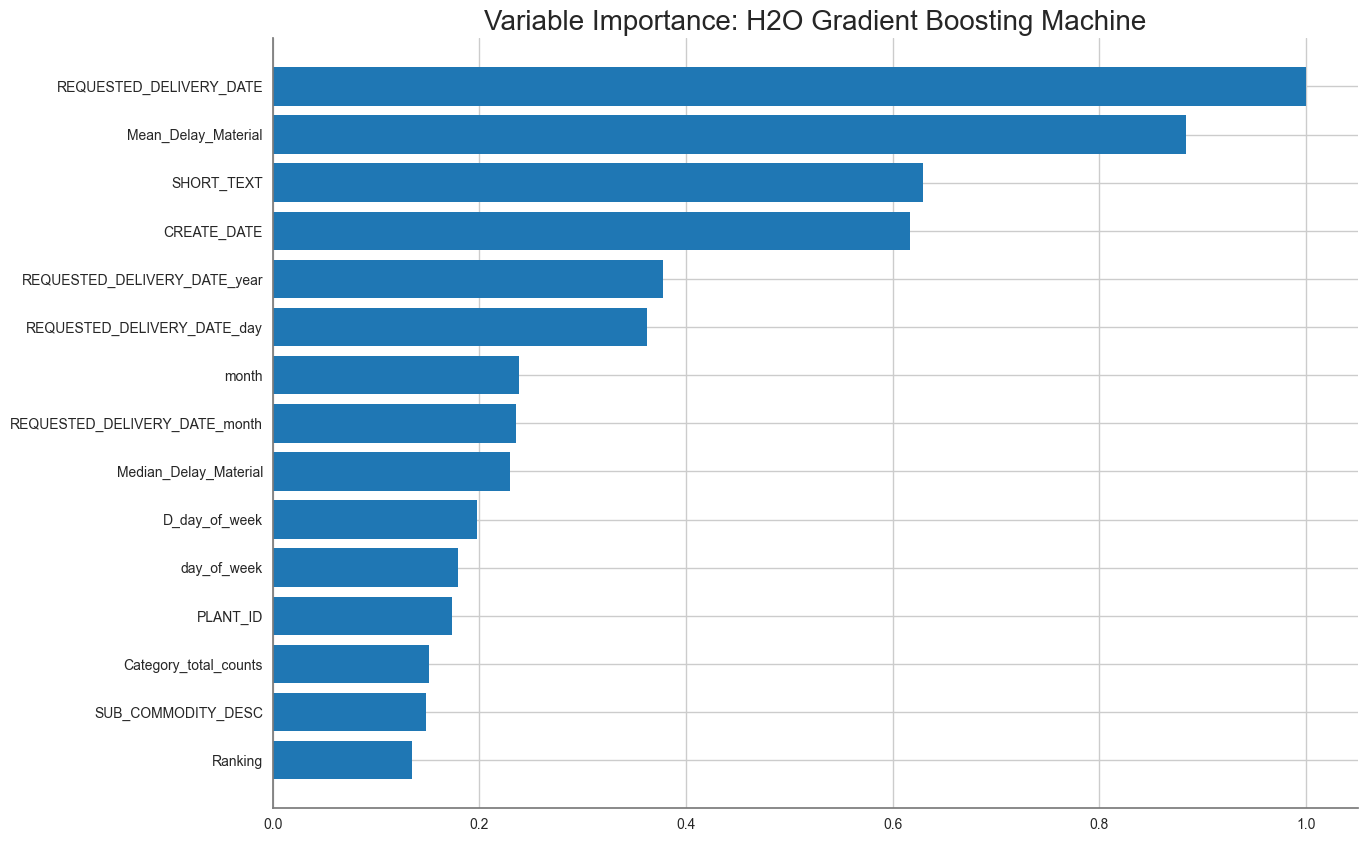

<Figure size 800x550 with 0 Axes>

In [ ]:
# plot the graph for variable importance
model.varimp_plot(num_of_features = 15)

Trying NLP With Short Text

In [438]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

df = koch

# Text preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords and punctuation
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

test_text = df['SHORT_TEXT'].iloc[0]  # Assuming this is a valid text entry
try:
    result = preprocess_text(test_text)
    print(result)
except Exception as e:
    print(f"Error processing text: {e}")




od x wall long astm


In [387]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/addisonjpratt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/addisonjpratt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/addisonjpratt/nltk_data...


True

In [384]:

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, predictions)}')

# Example prediction
example_text = "Urgent task due tomorrow"
processed_text = preprocess_text(example_text)
example_prediction = pipeline.predict([processed_text])
print(f'Predicted Time Difference for "{example_text}": {example_prediction[0]} days')


,SHORT_TEXT,D_day_of_week,COUNTRY,MATERIAL_ID,IS_HOLIDAY,Mean_Delay_Material,Median_Delay_Material,quarter,month,day_of_week,Ranking,Category_total_counts,PLANNED_DELIVERY_DAYS,INBOUND_DELIVERY_ITEM_ID,REQUESTED_DELIVERY_DATE,PLANT_ID,SUB_COMMODITY_DESC,COMPANY_CODE_ID,CREATE_DATE,Time_Difference
0,"1/2"" OD x 0.063"" Wall 20' Long ASTM A51",5.0,CA,NaN,0,NaN,NaN,3,7,1,10.0,38309.0,0.0,0.0,2021-08-06,4036.0,Machinery & Equipment,CA10,2021-07-26,6.0
1,994 45 9951A TU E 4.99-8.62 3X0X 4014,5.0,US,2.100008e+09,0,18.307692,3.0,3,7,1,2.0,106973.0,3.0,10.0,2021-09-10,4016.0,Custom Manufacturing,US10,2021-07-26,4.0
2,"5/8"" x 50 ft Black Rubber ProFitter[REG]",5.0,CA,NaN,0,NaN,NaN,3,7,1,5.0,77387.0,0.0,0.0,2021-08-27,4036.0,Piping & Tubing,CA10,2021-07-26,-24.0
3,4XL - HI-VIZ SAFETY LONG-SLEEVED SHIRT -,4.0,CA,NaN,0,NaN,NaN,3,7,1,7.0,57662.0,0.0,0.0,2021-08-05,4036.0,Material Handling,CA10,2021-07-26,-6.0
4,N66 2 BT 00WUD BN PL 65 1.5% 0,2.0,CA,2.100022e+09,0,0.000000,0.0,3,7,1,3.0,96024.0,0.0,10.0,2021-07-27,4007.0,Tolling,CA10,2021-07-26,7.0


In [440]:
koch.to_csv("all_koch2.csv")